In [1]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1: Initial exploration of the Dataset

In [2]:
# The first step with any dataset is to perform an initial exploration

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
!ls

05a_Matplotlib_Notebook.ipynb
05b_Exploring Indicator's Across Countries.ipynb
05c_Folium_Notebook.ipynb
Icon_
world-development-indicators


In [5]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [6]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Looks like it has different indicators for different countries with the year and value of the indicator. 

### How many UNIQUE country names are there ?

In [25]:
# We use the numpy .tolist method to return the np array (vector) data as a python list.
# We then can take the len of this list to see how many countries are in our dataset

countries = data['CountryName'].unique().tolist()
print(type(countries))
len(countries)

<class 'list'>


247

### Are there the same number of country codes ?

In [19]:
# How many unique country codes are there? (should be the same as the number of countries)

countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Are there many indicators or few ?

In [20]:
# How many unique indicators are there ?

indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### How many years of data do we have ?

In [21]:
# How many years of data do we have ?

years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [23]:
# below compares the min and max values of the list 'years'

print(min(years)," to ",max(years))

1960  to  2015


At this point we have a good feel for the dataset - we have various indicators of economic development per country over the time span of 1960 to 2015

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 1</p><br>

### Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [28]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

# first we create masks (boolean arrays) for the given data we want - set my variables
# hist_indiator and hist_country
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# we then filter the data using these masks on our original data and assign it to variable
# 'stage'. this returns the USA for country code and indicator CO2 emissions over time.

# more than one mask can be applied by using the '&' operator when indexing with them
stage = data[mask1 & mask2]

In [89]:
# as can be seen below, the data has been filtered to only include USA and CO2 emissions (metric
# tons per capita)

stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Let's see how emissions have changed over time using MatplotLib

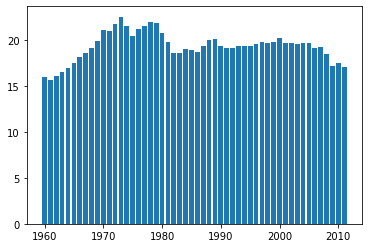

In [41]:
# below gets the year values from our stage Dataframe and returns as a rank 1 ndarray
years = stage['Year'].values

# below gets the CO2 emmissions values from our stage Dataframe and returns as a rank 1 ndarray 
co2 = stage['Value'].values

# we then create the bar chart b plotting years on the x axis and CO2 emissions on the y axis
# remember "plt" is an alias for matplotlib.pyplot. we use the bar method to create the chart
plt.bar(years,co2)

# the .show method is used to display the chart we've created
plt.show()

Turns out emissions per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it.

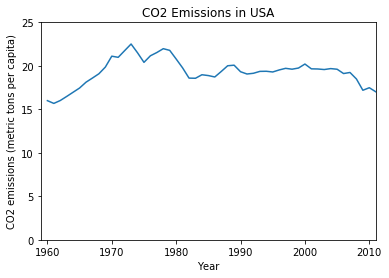

In [42]:
# we can switch to a line plot using the .plot method
plt.plot(years, co2)

# labelling the axis is accomplished using the .xlabel and y.label methods. Note: these methods
# take a number of arguments and you can change things like font size, colour etc.
plt.xlabel('Year')
# remember the .iloc method returns the integer index of row for the column argument
plt.ylabel(stage['IndicatorName'].iloc[0])

# .title method is used to label the figure
plt.title('CO2 Emissions in USA')

# to avoid our chart beingpotentially misleadng, we can start the y axis at 0. this is done
# using the .axis method, and putting in arguments for ranges of the respective x and y values.
plt.axis([1959, 2011, 0, 25])

plt.show()

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year. 

In [83]:
# If you want to just include those within one standard deviation of the mean, you could do the 
# following:

lower = stage['Value'].mean() - stage['Value'].std()
upper = stage['Value'].mean() + stage['Value'].std()

# we use list comprehension to create the filtered hist_data which contains only data within
# the bound of 1 standard deviation from the mean
hist_data = [x for x in stage[:len(stage)]['Value'] if x > lower and x < upper]

# Otherwise, let's look at all the data (comment out if want to use within 1 s.d. of mean data)
hist_data = stage['Value'].values

In [84]:
print(len(hist_data))

52


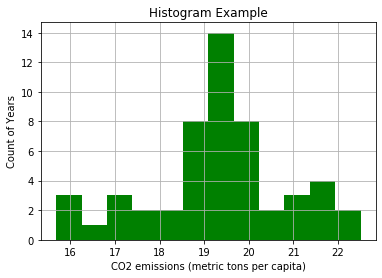

In [85]:
# histograms (frequency distributions) are plotted using the .hist method. takes arguments for 
# data source (which is a list or rank 1 ndarray), number of bins, density and facecolor (and 
# probably numerous others)

# bins is this thickness of the histogram per unit of data. e.g. use more bins when the data is
# dense, and fewer bins when it is sparse

plt.hist(hist_data, 12, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('Count of Years')
plt.title('Histogram Example')

# the .grid method shows gridlines in the plot when set to True. Can make the plot more readable
plt.grid(True)

plt.show()

We can see the USA has many years where it produced between 19-20 metric tons per capita with outliers on either side.

### But how do the USA's numbers relate to those of other countries?

In [86]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

# our first mask returns boolean array, True for data which has IndicatorName containing 
# 'CO2 emissions \(metric'
# our second mask returns another boolean array using the .isin method. the isin() method is used
# to filter Dataframes. it selects rows that have a particular value in a particular column.
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# we apply both masks to our data and assign to Dataframe variable co2_2011
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


For how many countries do we have CO2 per capita emissions data in 2011

In [87]:
print(len(co2_2011))

232


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


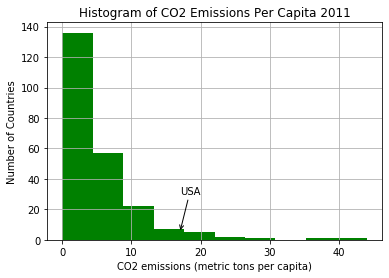

In [94]:
# let's plot a histogram of the emmissions per capita by country in 2011

# .subplots  method returns a tuple with the figure, axis attributes.
fig, ax = plt.subplots()

# the .annotate method annotates the point xy with text. In the simplest form, the text is 
# placed at xy. Optionally the text can be displayed in another position xytext. An arrow pointing
# from the text to the annotated point xy can then be added by defining arrowprops as below

# in below, "USA" is the text being annotated. xy is where the arrow will point to, xytext is 
# position where the text will be placed. xycoords and textcoords = 'data' ensures the coordinates
# are set using the system of the object being annotated (this is the default). arrowprops us used
# to draw a FancyArrowPatch arrow between the positions xy and xytext.
ax.annotate("USA",
            xy=(17, 5), xycoords='data',
            xytext=(17, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

# as previously, we plot the histogram using the .hist method
plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('Number of Countries')
plt.title('Histogram of CO2 Emissions Per Capita 2011')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

So the USA, at ~17 CO2 emissions (metric tons per capital) in 2011 is quite high among all countries.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

In [120]:
# below applies more masks to the data to filter by high emmittors in 2011 (>12 CO2 emissions)

hist_indicator = 'CO2 emissions \(metric'
Year = '2011'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([year])
mask3 = data['Value'] > 12

highemmittors = data[mask1 & mask2 & mask3]

sorted = highemmittors.sort_values(by=['Value'], axis=0, ascending=False)
sorted.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5161482,Qatar,QAT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,44.018926
5188137,Trinidad and Tobago,TTO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,37.140054
5122885,Kuwait,KWT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,28.102662
5067585,Brunei Darussalam,BRN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,24.392013
5053556,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,23.922412


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


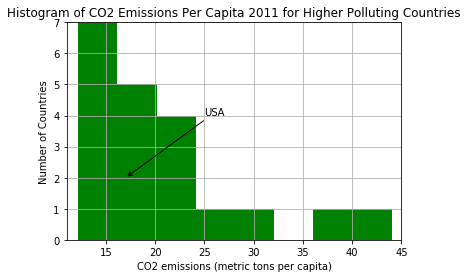

In [124]:
# this is then plotted similar to before, except with the filtered data to show only 
# high emmitting countries of CO2

fig, ax = plt.subplots()
ax.annotate("USA",
            xy=(17, 2), xycoords='data',
            xytext=(25, 4), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(highemmittors['Value'], 8, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('Number of Countries')
plt.title('Histogram of CO2 Emissions Per Capita 2011 for Higher Polluting Countries')

plt.axis([11, 45, 0, 7])
plt.grid(True)
plt.show()

<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 2</p>

### Relationship between GDP and CO2 Emissions in USA

In [126]:
# We want to find the relationship between GDP per capita and CO2 emissions. First we will 
# compile a filtered set of data to yield just USA GDP per capita using masks as before
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

# remember the masks are boolean arrays that we index the data with
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# we assign the filtered data to a new array 'gdp_stage'. it is just the data matching 
# the USA for country code and CO2 emissions as indicator over time.
gdp_stage = data[mask1 & mask2]

In [129]:
# to check the filtered data we use .head()

gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [130]:
# remember the 'stage' variable is a Dataframe of the USA's CO2 emmissions from 1960

stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


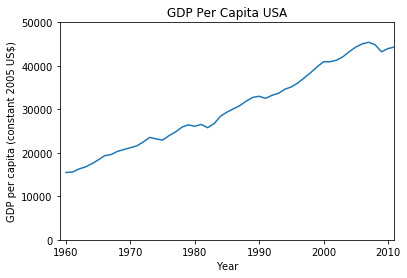

In [137]:
# to plot a line plot, we ue the .plot method, passing in years for the x axis and GDP values
# for the y axis. remember .values returns data as a rank 1 ndarray
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make potentially more comparable to other countries, we can start the y axis at 0
plt.axis([1959, 2011, 0,50000])

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita (probably low correlation). GDP has been fairly steady since 1960, aside
from the dip in 2008, while CO2 emissions have slowly declined over this period

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

When comparing two or more datasets over time, we first need to make sure we're looking at the same time frames for each variable compared

In [138]:
# to get min and max values, simply use the .min and .max methods on each set of data

print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


We can see we have  3 extra years of GDP data. We need to trim these off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [140]:
# to truncate the data, we simply run a filter with the criteria of the year being < 2012. This
# is assigned to a new Dataframe 'gdp_stage_trunc'

gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

# We now see the lengths in years of our two datasets are the same (both 1960 -> 2011)
print(len(gdp_stage_trunc))
print(len(stage))

52
52


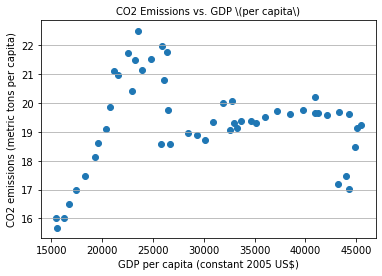

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt

# in starting the scatter plot, lets use the .subplots method again to returns a tuple with the
# figure, axis attributes. doing this, we can then use methods on the axis as below
fig, axis = plt.subplots()

# .grid method sets grid line. can be applied to either x, y or both axis's. Further, we can set
# the labels and title from the new axis variable
axis.yaxis.grid(True)

# as shown belowm fontsize can be specified for labels and the title
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

# below we assign the data we want to plot to variables X and Y
X = gdp_stage_trunc['Value']
Y = stage['Value']

# we then plot the data using the .scatter method, passing arguments in for the X and Y data
# which is the data being compared
# Note: the data is plotted incrementally by year, although year is not shown
axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship. It looks like when GDP and CO2 emissions were climbing in the 60's they tracked together. But after that there doesn't seem to be much of a relationship at all. We can test this by looking at correlation.

In [147]:
# we test for correlation between datasets using the np.corrcoef() method.

np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

A correlation of 0.07 is pretty weak. If someone were to argue we need more CO2 production per capita to boost our economy, this initial data analysis would not support that claim.

You could continue to explore this to see if other countries have a closer relationship between CO2 emissions and GDP.  Perhaps it is stronger for developing countries?

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

In [148]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>